# Masks eclipse trend array 

We create the ***Figure S11***

In this notebook we load the arrays we have plotted separately in different notebooks. We take the ***ECLIPSE_V6b_CLE_base_BC.nc*** data and use it for the lat and lons. 

In [1]:
import numpy as np
from scipy import interpolate
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.interpolate as inter
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.ticker as ticker

# Load arrays: 

In [22]:
loadpath = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis'
savepath_plot = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\plots'

In [15]:
ECLIPSE_array = np.loadtxt(loadpath+'\\ECLIPSE\\trend_array\\trend_array.txt') 
HYSPLIT_array = np.loadtxt(loadpath+'\\abs\\trend_array\\trend_array_2002_2022.txt')
print(ECLIPSE_array.size)
print(HYSPLIT_array.size)

129600
32400


## Arrays: 

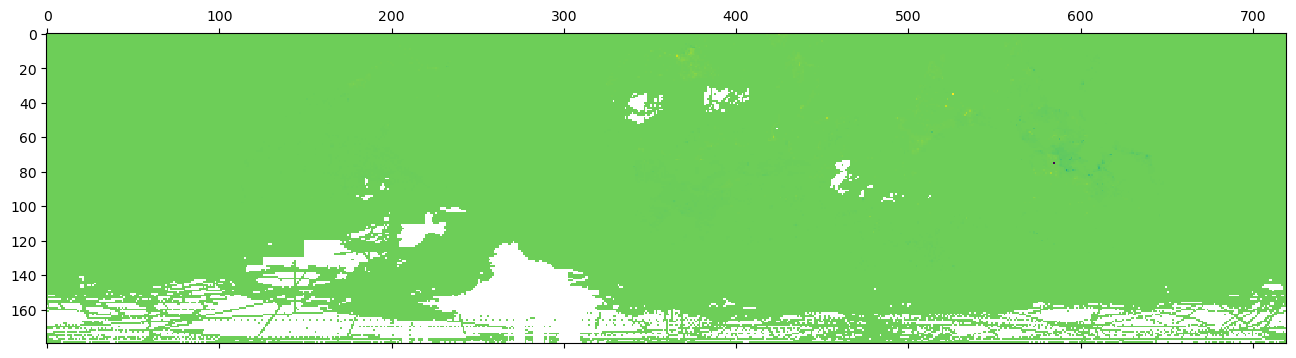

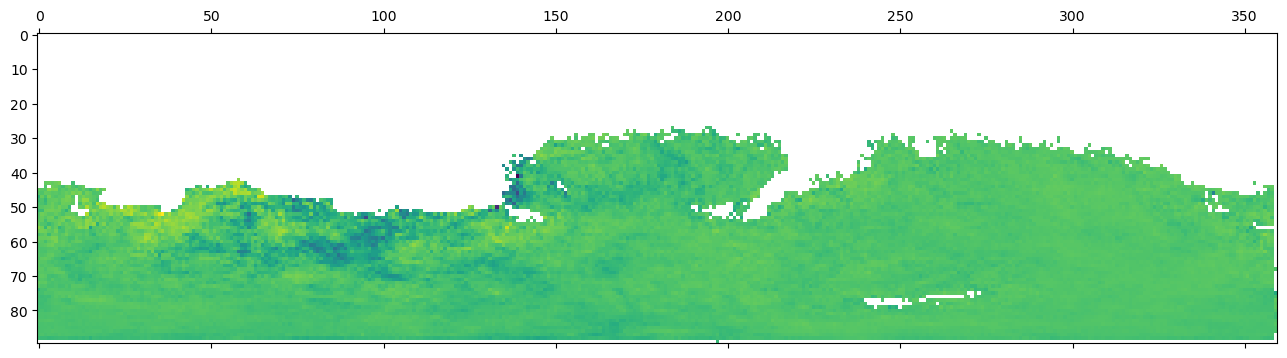

In [3]:
plt.matshow(ECLIPSE_array)
plt.show()
plt.matshow(HYSPLIT_array)
plt.show()

# repeat array: 

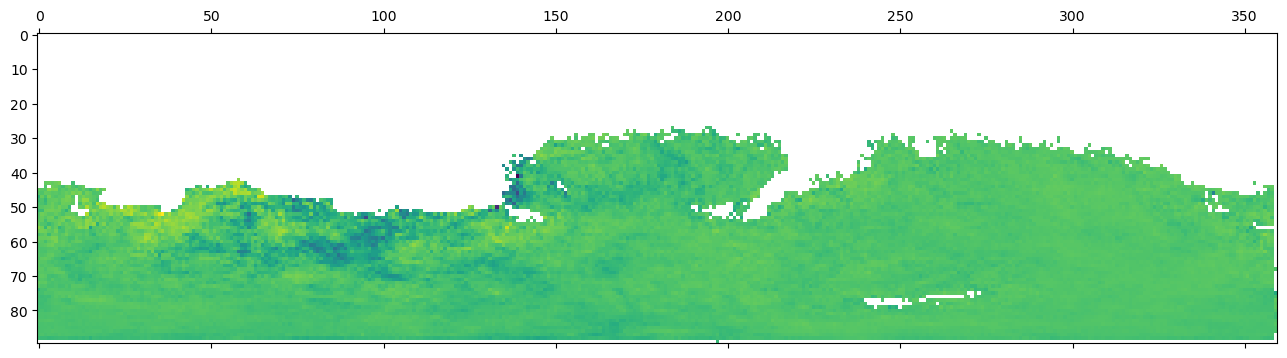

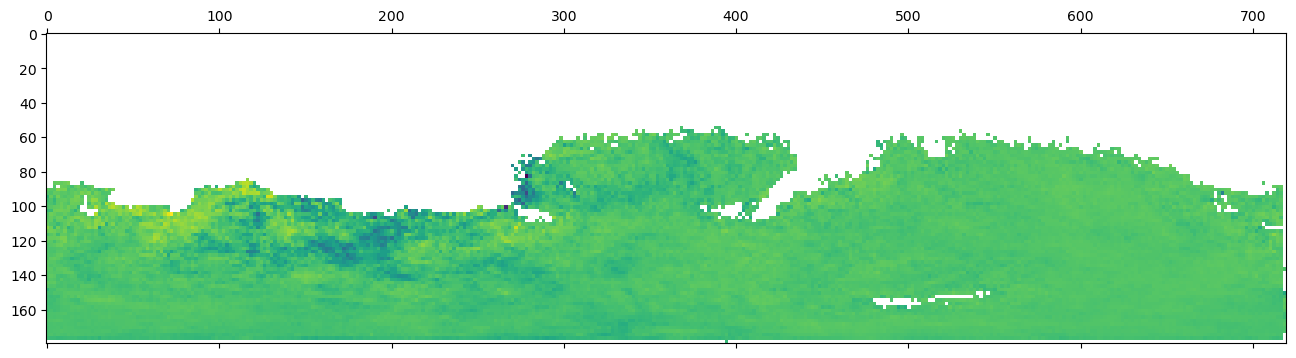

In [4]:
HYSPLIT_array_x2 = HYSPLIT_array.repeat(2,axis=0).repeat(2,axis=1)

plt.matshow(HYSPLIT_array)
plt.matshow(HYSPLIT_array_x2)
plt.show()

# Plot array: 

In [16]:
import sys

script_path = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts'

sys.path.append(script_path+'\HYSPLIT_plotting')
import HYSPLIT_plotting as HYplot

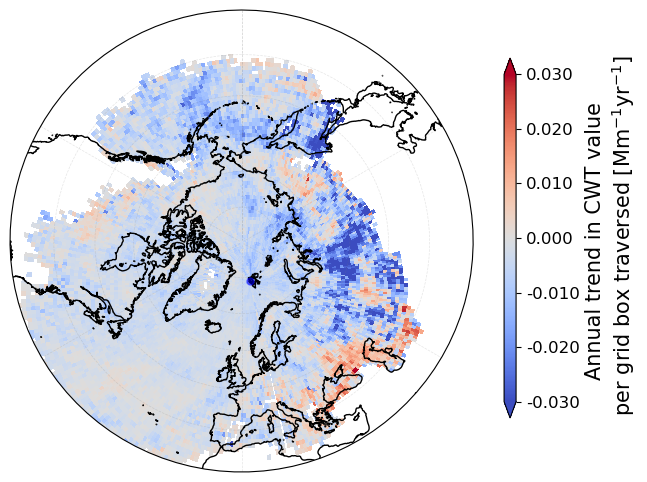

In [17]:
fig = HYplot.circular_plots_array(HYSPLIT_array, vmin=-0.03, vmax=0.03, cmap='coolwarm', 
               orientation='vertical', colourbar_label="Annual trend in CWT value \n per grid box traversed [Mm$^{-1}$yr$^{-1}$]", 
               colourbar_labelsize=15, colourbar_tick_fontsize=12, decimal_places_colourbar=3,
               scientific_notation=False, axes_projection='North_Stereo', array_projection='rotated_pole', title='',
               extend='both')

In [18]:
def circular_plots_array(array, vmax, cmap, orientation, colourbar_label, 
                         lons, lats, colourbar_labelsize=20, colourbar_tick_fontsize=12, 
                       scientific_notation=True, decimal_places_colourbar=0, axes_projection='North_Stereo', 
                       array_projection='rotated_pole', title=None, ZEP_lat=78.906,ZEP_lon=11.888, test_data=None,
                       figsize_x=6,fig_size_y=6, vmin=0, extend='max', central_longitude=0,
                       lat_min=30, add_empty_hatch=False, ax=None): 
    
    dict_projections = HYplot.create_projections_dict(ZEP_lat=78.906,ZEP_lon=11.888, central_longitude=central_longitude)                   
    projection = dict_projections[axes_projection] 
    array_projection = dict_projections[array_projection] 
    geo = dict_projections['geo']    
    
    single_figure = False
    if ax is None:
        fig, ax = HYplot.sp_map(1, projection=projection, figsize=(figsize_x,fig_size_y))
        single_figure = True

    lat_lims = [lat_min,90]
    HYplot.polarCentral_set_latlim(lat_lims, ax)                
    
    if add_empty_hatch == True:
        empty_array = HYplot.make_array(1)
        empty_array = empty_array.repeat(2,axis=0).repeat(2,axis=1)

    if add_empty_hatch == False:
        cs = ax.pcolormesh(lons, lats, array, transform=array_projection,
                           cmap=cmap, vmin=vmin, vmax=vmax)
    ax.plot([ZEP_lon], [ZEP_lat], 'bo', ms=5, alpha=0.5, transform=geo) 
    
    if test_data is not None:
        latitudes = list(test_data['latitude'].values)
        longitudes = list(test_data['longitude'].values)
        ax.plot(longitudes, latitudes, 'bo', ms=5, alpha=0.2, transform=geo) 

    ax.set_title(str(title), loc='left', size=15)  
    HYplot.add_map_features(ax)        
    
    if ax is None:
        plt.show()
        return fig
    if single_figure == False:
        return ax

In [21]:
path = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\eclipse'
filename = '\\ECLIPSE_V6b_CLE_base_BC'

ECLIPSE_V6b = xr.open_dataset(path+'\\'+filename+'.nc')

ECLIPSE_V6b_yr = ECLIPSE_V6b.sel(time=2020)
ECLIPSE_V6b_yr_NH = ECLIPSE_V6b_yr.sel(lat=slice(0,90))
lats = ECLIPSE_V6b_yr_NH.lat.values
lons = ECLIPSE_V6b_yr_NH.lon.values

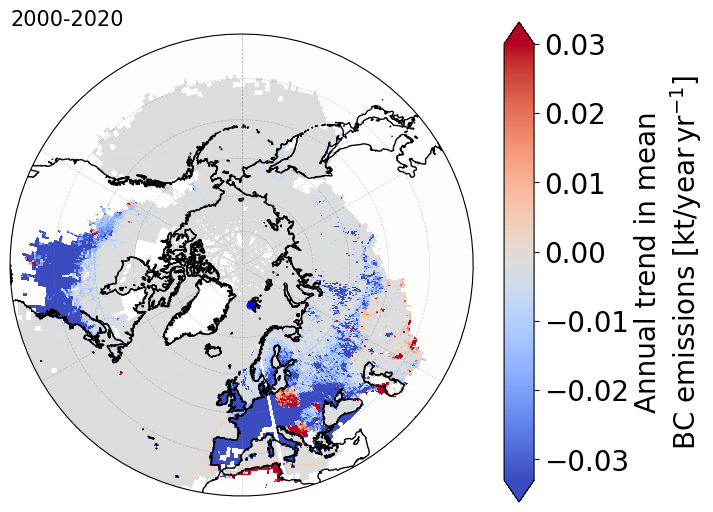

['C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\plots']
make folder
saved as: C:\Users\DominicHeslinRees\Documents\ACP_2023\plots\\FigureS11.png


In [23]:
dict_projections = HYplot.create_projections_dict(ZEP_lat=78.906,ZEP_lon=11.888, central_longitude=0)    
projection = dict_projections['North_Stereo'] 

fig, ax = HYplot.sp_map(1, projection=projection, figsize=(6,6))
circular_plots_array(ECLIPSE_array, lons=lons, lats=lats, vmin=-0.03, vmax=0.03, cmap='coolwarm', 
               orientation='vertical', colourbar_label="Annual trend in mean\nBC emissions [kt/year$\,$yr$^{-1}$]", 
               colourbar_labelsize=15, colourbar_tick_fontsize=12, decimal_places_colourbar=2,
               scientific_notation=True, axes_projection='North_Stereo', array_projection='PlateCarree', title='2000-2020',
               extend='both', lat_min=20, ax=ax)

HYSPLIT_array_x2_zeros = np.nan_to_num(HYSPLIT_array_x2)
HYSPLIT_array_x2_zeros[HYSPLIT_array_x2_zeros != 0] = np.nan

circular_plots_array(HYSPLIT_array_x2_zeros, lons=lons, lats=lats, vmin=-10**10, vmax=10**10, cmap='seismic', 
               orientation='vertical', colourbar_label="Annual trend in mean\nBC emissions [kt/year$\,$yr$^{-1}$]", 
               colourbar_labelsize=15, colourbar_tick_fontsize=12, decimal_places_colourbar=2,
               scientific_notation=True, axes_projection='North_Stereo', array_projection='rotated_pole', title='2000-2020',
               extend='both', lat_min=30, ax=ax)

orientation='vertical'
scientific_notation=False
vmin = 0.03
vmax = -0.03
cmap = 'coolwarm'
extend = 'both'
colourbar_label = "Annual trend in mean\nBC emissions [kt/year$\,$yr$^{-1}$]"

cb_height=0.8
cb_width = 0.05

cbar_ax = fig.add_axes([.95, .1, cb_width, cb_height]) #position of colorbar [left, bottom, width, height]
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

fmt = None
if scientific_notation == True:
    print("use scientific notation:")
    fmt = ticker.ScalarFormatter(useMathText=True)
    fmt.set_powerlimits((0, 0))    
cb = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
                               norm=norm, orientation=orientation, extend=extend, format=fmt)
cb.set_label(colourbar_label, fontsize=20)
cb.ax.tick_params(labelsize=20)
cb.ax.yaxis.set_offset_position('left')    
cb.ax.yaxis.get_offset_text().set_fontsize(20)    
cb.update_ticks()

plt.show()
HYplot.save_plot(fig, savepath_plot, name='FigureS11', formate='.png', dpi=300)